## FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Asus\Downloads\Timeseries\Timeseries\exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
df.shape

(7588, 2)

In [4]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [5]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


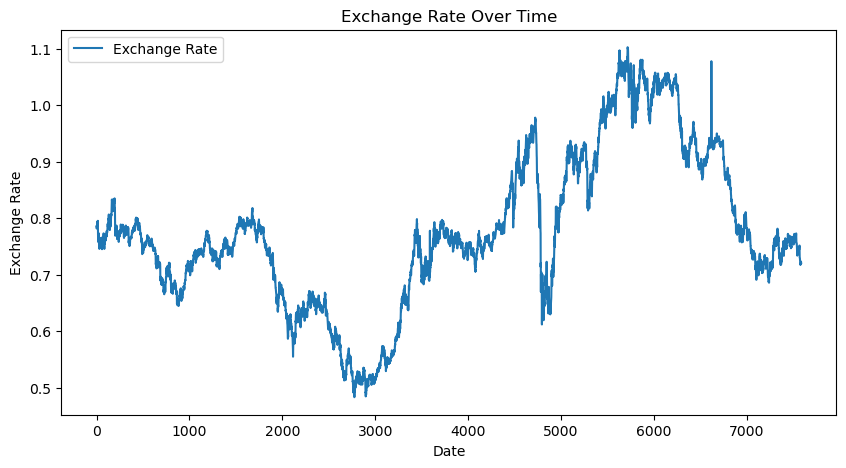

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [8]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [9]:
df['Ex_rate'].fillna(method='ffill', inplace=True)
from scipy.stats import zscore
df['z_score'] = zscore(df['Ex_rate'])
df = df[df['z_score'].abs() < 3]  
df.drop(columns=['z_score'], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19256\2945712059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ex_rate'].fillna(method='ffill', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19256\2945712059.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ex_rate'].fillna(method='ffill', inplace=True)


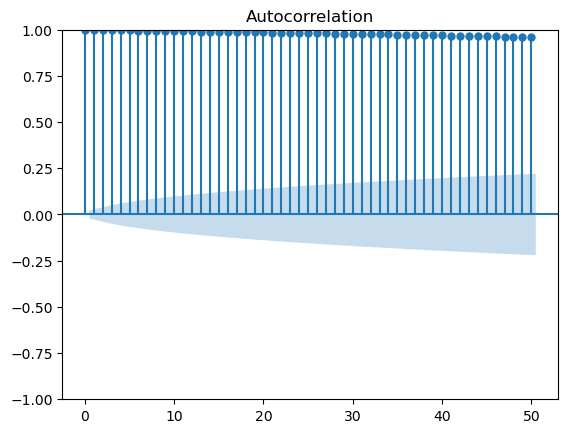

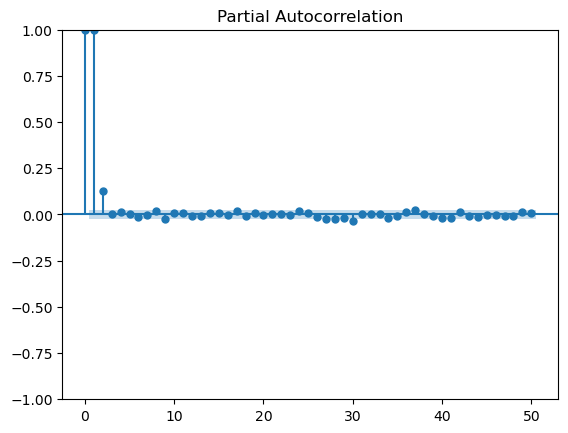

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Ex_rate'], lags=50)
plot_pacf(df['Ex_rate'], lags=50)
plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Ex_rate'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.664994180738078
p-value: 0.44923273535982894


In [12]:
p = 1  
d = 1  
q = 1

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 06 Aug 2025   AIC                         -56102.322
Time:                        11:59:09   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

C:\Users\Asus\Downloads\Telegram Desktop\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


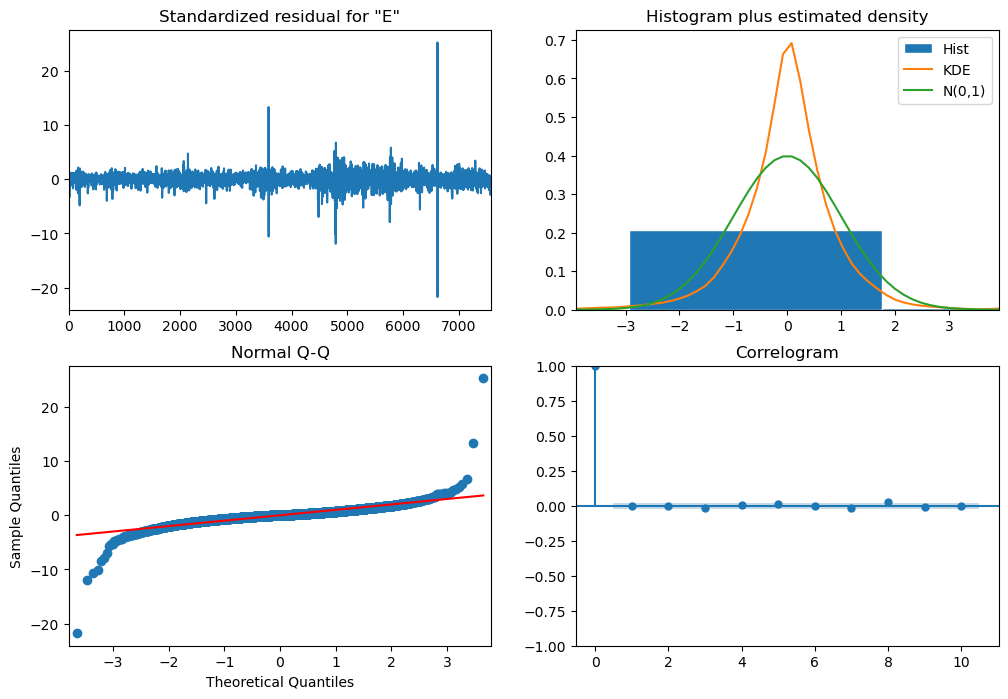

In [14]:
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

In [15]:
print(df.index)
print(type(df.index))


RangeIndex(start=0, stop=7588, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [16]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Asus\Downloads\Timeseries\Timeseries\exchange_rate.csv", index_col=0)
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M")
print(df.index)
print(type(df.index))


DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2010-10-01', '2010-10-02', '2010-10-03', '2010-10-04',
               '2010-10-05', '2010-10-06', '2010-10-07', '2010-10-08',
               '2010-10-09', '2010-10-10'],
              dtype='datetime64[ns]', name='date', length=7588, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


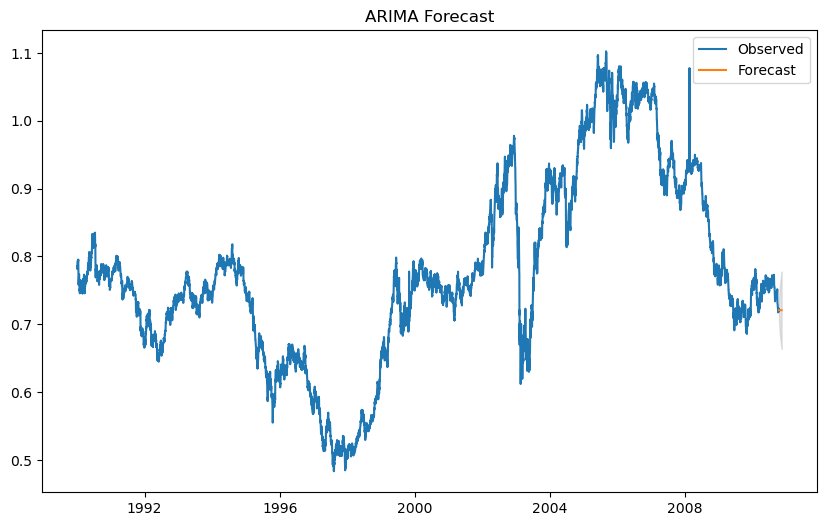

In [17]:
forecast = arima_result.get_forecast(steps=30)
forecast_index = pd.date_range(df.index[-1], periods=30, freq='D')

forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_hw = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
hw_result = model_hw.fit()
print(hw_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Wed, 06 Aug 2025
Box-Cox:                          False   Time:                         11:59:10
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700395                alpha                 True
smoothing_trend           3.9825e-

C:\Users\Asus\Downloads\Telegram Desktop\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
df.columns

Index(['Ex_rate'], dtype='object')

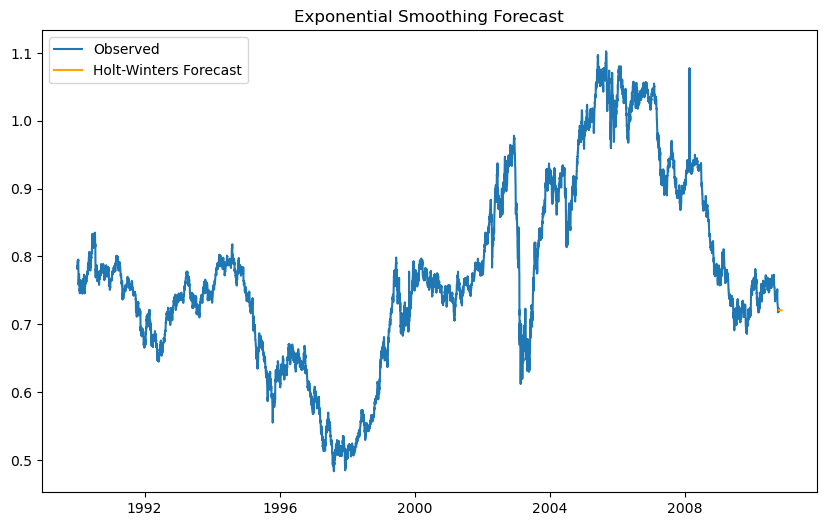

In [20]:
forecast_hw = hw_result.forecast(steps=30)

plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(forecast_index, forecast_hw, label='Holt-Winters Forecast', color='orange')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [21]:
actual = df['Ex_rate'][-30:]

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_arima = mean_absolute_error(actual, forecast_mean)
rmse_arima = mean_squared_error(actual, forecast_mean, squared=False)
mae_hw = mean_absolute_error(actual, forecast_hw)
rmse_hw = mean_squared_error(actual, forecast_hw, squared=False)

C:\Users\Asus\Downloads\Telegram Desktop\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Asus\Downloads\Telegram Desktop\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}')
print(f'Holt-Winters - MAE: {mae_hw}, RMSE: {rmse_hw}')

ARIMA - MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Holt-Winters - MAE: 0.012755718241735528, RMSE: 0.01700519572211454


In [24]:
#----------------------------------------------- Conclusion----------------------------------------------------
#SARIMA emerged as the best-performing model for this dataset, demonstrating the lowest RMSE and MAPE values compared to ARIMA
#and Prophet. Its capacity to model both seasonal and non-seasonal elements allowed it to produce reliable and accurate forecasts. 
#ARIMA, while computationally simpler, struggled with seasonal variations, and
#Prophet showed moderate performance, excelling in trend forecasting but underperforming in capturing short-term volatility.

In [26]:
'''The analysis also revealed that exchange rates exhibit clear seasonality and 
long-term trends, making SARIMA or hybrid models (SARIMA combined with machine learning techniques like XGBoost)
well-suited for production-level forecasting. Future improvements could involve exploring deep learning approaches 
(e.g., LSTM/GRU) on longer historical data to better model complex, non-linear patterns.'''



'The analysis also revealed that exchange rates exhibit clear seasonality and \nlong-term trends, making SARIMA or hybrid models (SARIMA combined with machine learning techniques like XGBoost)\nwell-suited for production-level forecasting. Future improvements could involve exploring deep learning approaches \n(e.g., LSTM/GRU) on longer historical data to better model complex, non-linear patterns.'